# 1. Project Title: Machine Learning for Jewelry Price Optimisation
 The project aims to successfull predict the prices of jewelry  this will allow the jewelry company to reduce its dependence on Gemologists and expensive jewelry appraisal experts.

# 2. Methodology
This project will be carried out using the Cross Industry Standard Process for Data Mining (CRISP-DM) Methodology. This is one of the most popular data science methodologies and it's characterised by six important phases:
1. Business understanding,
2. Data understanding,
3. Data preparattion,
4. Data Modeling,
5. Model Evaluation, and
6. Model Deployment.

It should be noted that these phases are recurrent in nature (i.e. some phases may be repeated). As such, they do not necessarily follow a linear progression.

# 3. Tools
1. Pandas
2. NumPy
3. Matplotlib and seaborn: these are Python libraries trained for visualisation. The alternatives are **Bokeh** or **Plotly**
4. sci-kit learn: It's Python library which is extensively use for machine learning. It has a simple API centred around two main types of objects:
i. **Transformers** and
ii. **Estimators**

**Project Implementation vis CRISP-DM**




**1. Business understanding**

**2. Data understanding**
- This involves the process of Exploratory Data Analysis (EDA)
- The required libraries and packages are imported first. The high-level steps to follow are:
1. import the required libraries
2. Load in the dataset
3. Analyse and observe its properties
- Missing
- Outliers
- Inconsistent values
- Low categorical cardinality
- Data Imbalance
- Feature correlations
4. Report on these properties and how they might affect the final solution  



In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# set visualization theme
sns.set()

In [4]:
# Import the dataset

data = pd.read_csv(r"C:\Users\USER\Desktop\AMDARI PROJECTS 29 6 24\ML Jewelry price Optimisation\Jewelry_Dataset.csv")
pd.set_option('display.max_columns', None) #displayed all the columns


# The dataset doesn't have column header. Column headers are added with the block of code below

data.columns = [
    'Order_datetime',
    'Order_ID',
    'product_ID',
    'SKU_Quantity',
    'Category_ID',
    'Category',
    'Brand_ID',
    'Price_USD',
    'User_ID',
    'Target_Gender',
    'Main_Color',
    'Main_metal',
    'Main_gem',
]

In [5]:
# Peep at the dataset
data.head(3)

,Order_datetime,Order_ID,product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_metal,Main_gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond


In [6]:
# Check for missing values
data.isnull().sum()

Order_datetime        0
Order_ID              0
product_ID            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_metal         5462
Main_gem          34058
dtype: int64

In [7]:
data.shape

(95910, 13)

In [8]:
# Feature cardinality
data.nunique()

Order_datetime    74504
Order_ID          74759
product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_metal            3
Main_gem             30
dtype: int64

In [9]:
# Data Description
data.describe()

,Order_ID,product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_metal      90448 non-null  object 
 12  Main_gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [11]:
data.duplicated().sum()

2589

In [12]:
num_duplicates = len(data[data.duplicated()])
num_duplicates

2589

In [13]:
num_duplicated = len(data.loc[data.duplicated()])
print(f'Number of duplicates :', num_duplicated )

Number of duplicates : 2589


In [14]:
# Features with a cardinality of one (Invariant feature)
invariant_features = data.nunique()[data.nunique()==1].index.tolist()
invariant_features

['SKU_Quantity']

In [15]:
# Check for price distribution
data['Price_USD'].skew() # The output shows that the skew is positive

18.95906072625981

In [16]:
# Price kurtosis
data['Price_USD'].kurtosis() # The output shows a very high kurtosis

1054.8979068506155

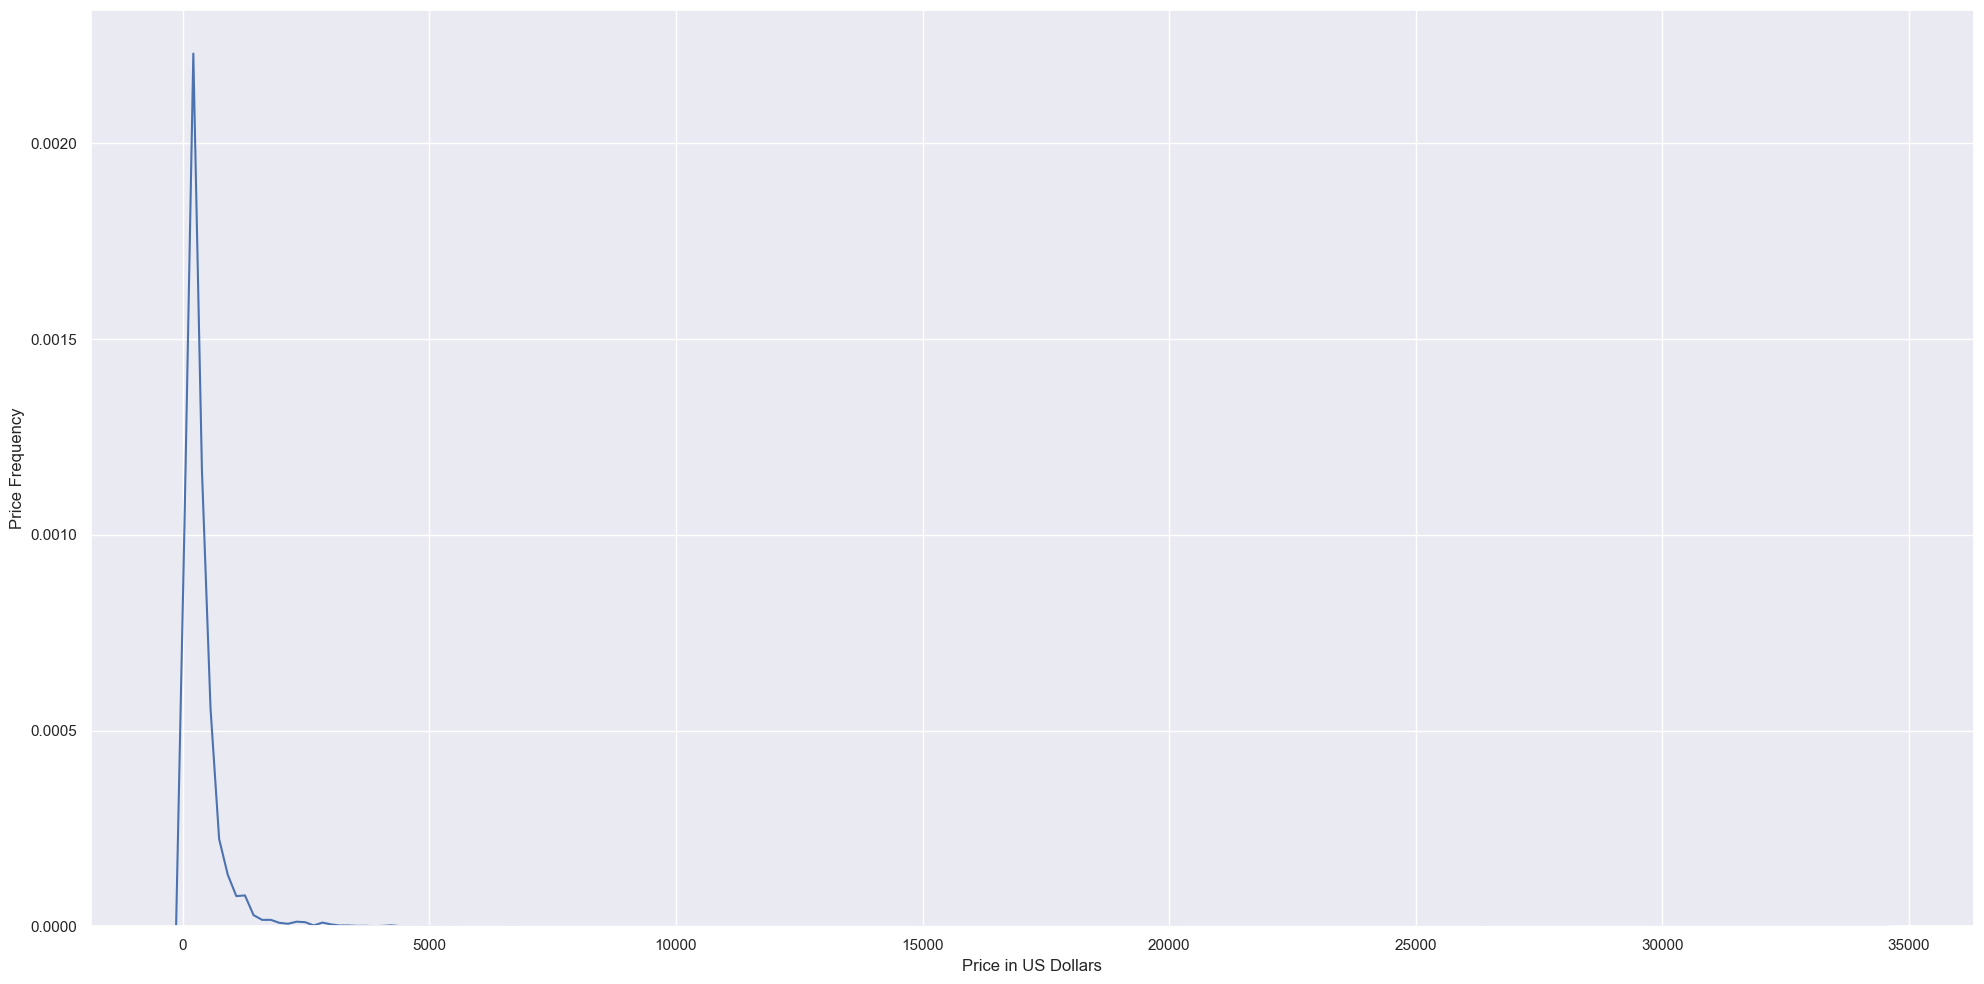

In [17]:
# Visualise price distribution
plt.figure(figsize =(20, 10))

sns.kdeplot(data = data, x = 'Price_USD')

plt.xlabel('Price in US Dollars')
plt.ylabel('Price Frequency')

plt.tight_layout()
plt.show(); plt.close()

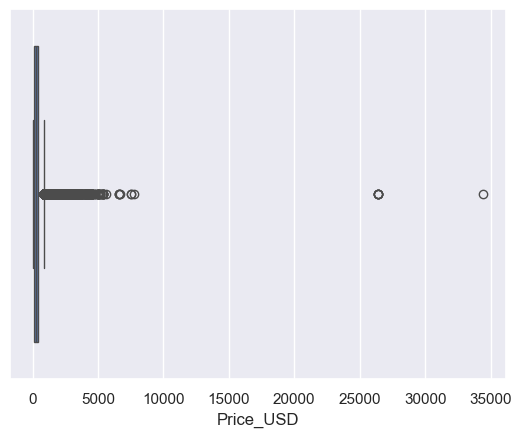

In [18]:
# Check for outliers
sns.boxplot(x=data['Price_USD']);

In [20]:
data['Target_Gender'].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [22]:
data['Target_Gender'].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

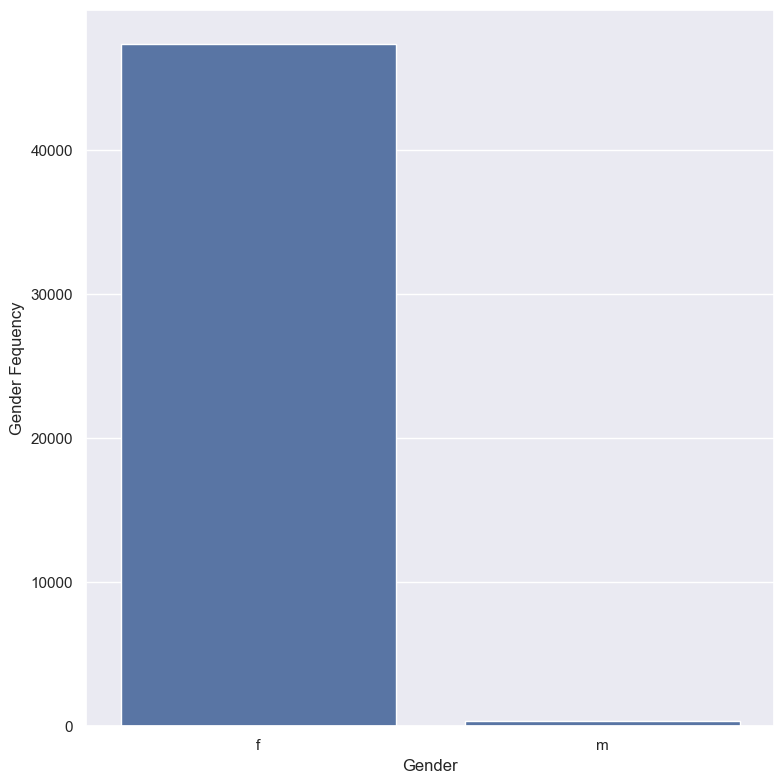

In [27]:
# Visualise the tsrget Gender

plt.figure(figsize = (8, 8))

sns.countplot(data = data, x = 'Target_Gender')

plt.xlabel('Gender')
plt.ylabel('Gender Fequency')

plt.tight_layout()

plt.show(); plt.close()

In [30]:
data.columns

Index(['Order_datetime', 'Order_ID', 'product_ID', 'SKU_Quantity',
       'Category_ID', 'Category', 'Brand_ID', 'Price_USD', 'User_ID',
       'Target_Gender', 'Main_Color', 'Main_metal', 'Main_gem'],
      dtype='object')

In [33]:
data['Main_Color'].unique().tolist()

['yellow', 'white', 'red', nan, 'unknown-color', 'black']

In [36]:
data['Main_metal'].unique().tolist()

['gold', 'silver', nan, 'platinum']

In [39]:
data['Main_gem'].unique().tolist()

[nan,
 'sapphire',
 'diamond',
 'amethyst',
 'fianit',
 'pearl',
 'quartz',
 'topaz',
 'garnet',
 'quartz_smoky',
 'ruby',
 'agate',
 'mix',
 'citrine',
 'emerald',
 'amber',
 'chrysolite',
 'chrysoprase',
 'nanocrystal',
 'turquoise',
 'sitall',
 'corundum_synthetic',
 'coral',
 'onyx',
 'nacre',
 'spinel',
 'tourmaline',
 'emerald_geothermal',
 'garnet_synthetic',
 'rhodolite',
 'sapphire_geothermal']

In [40]:
data['Category'].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [41]:
# Jewelry category analysis
data['Category'].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [43]:
# Extract the actual categories
categories = data['Category'].unique()
categories = [c for c in categories if isinstance(c, str) and 'jewelry' in c ]

In [44]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [45]:
# pick out authentic data based on the categories
real_categories = data.loc[data['Category'].isin(categories)]


In [47]:
# Percentage of missing values
100*data.isnull().sum()/len(data)

Order_datetime     0.000000
Order_ID           0.000000
product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_metal         5.694922
Main_gem          35.510374
dtype: float64

In [48]:
100*real_categories.isnull().sum()/len(real_categories)

Order_datetime     0.000000
Order_ID           0.000000
product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_metal         0.110617
Main_gem          24.232519
dtype: float64

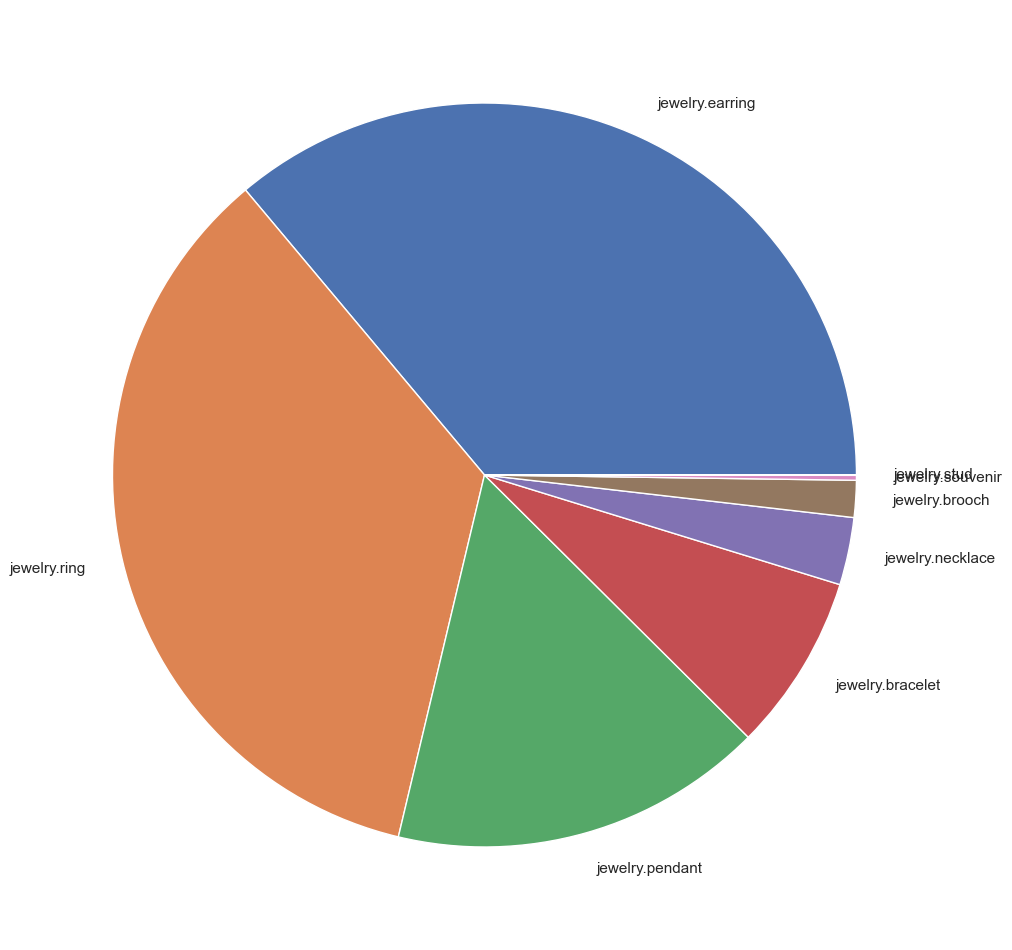

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
jewelry.necklace     2361
jewelry.brooch       1288
jewelry.souvenir      170
jewelry.stud           12
Name: count, dtype: int64

In [52]:
# Visualize jewelry categories

subdata = real_categories['Category'].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()
plt.figure(figsize = (12, 15))
plt.pie(x = counts, labels = jewelry_categories)
plt.show(); plt.close()


real_categories['Category'].value_counts()

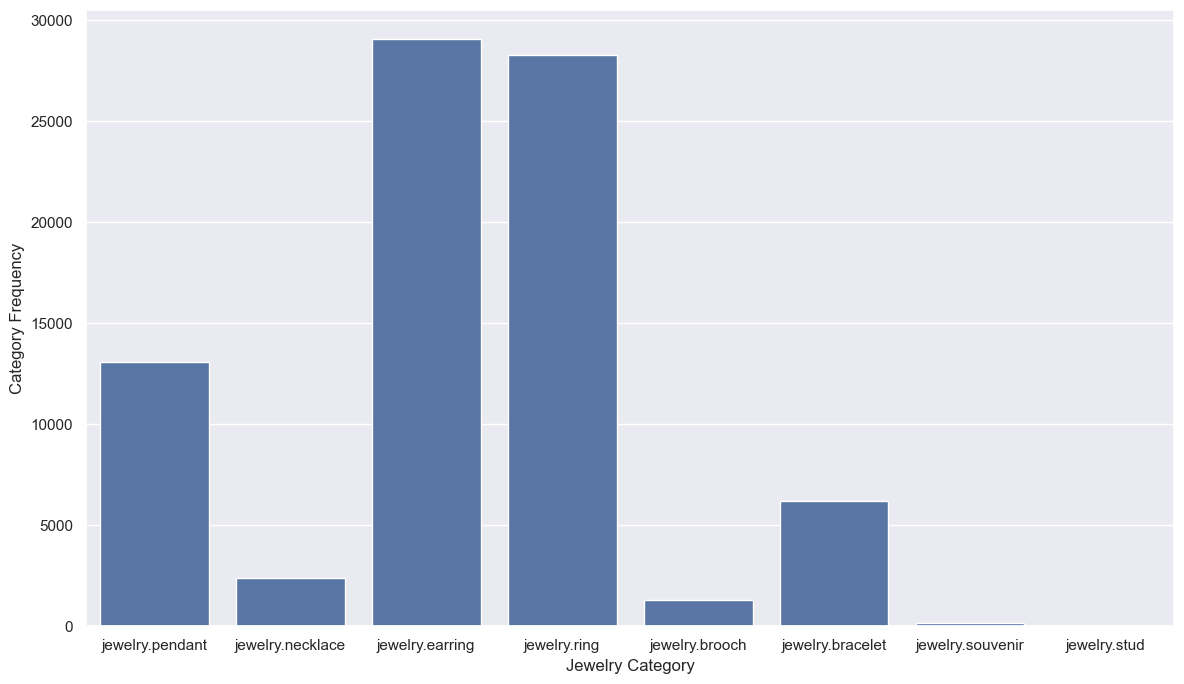

In [57]:
# Category count plot

plt.figure(figsize =(12, 7))
sns.countplot(data = real_categories, x = 'Category')

plt.xlabel('Jewelry Category')
plt.ylabel('Category Frequency')

plt.tight_layout()
plt.show(); plt.close()

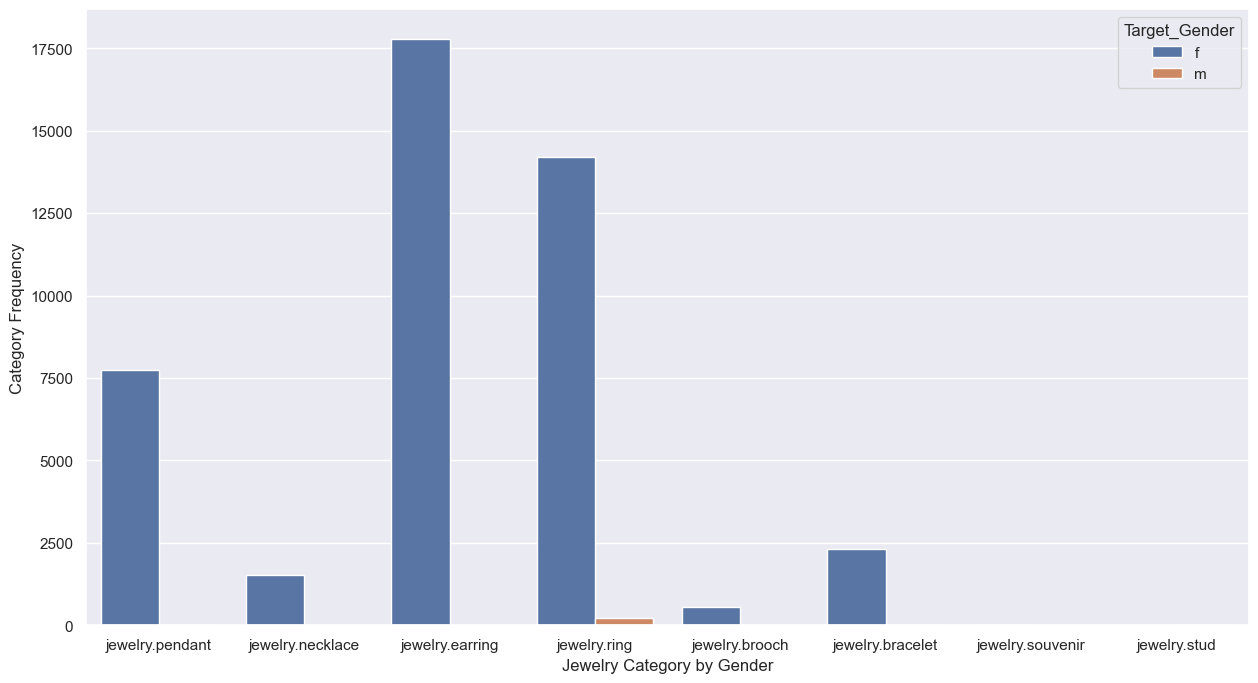

In [60]:
# jewelry category by gender
plt.figure(figsize = (15, 8))
sns.countplot(data = real_categories, x = 'Category', hue = 'Target_Gender')

plt.xlabel('Jewelry Category by Gender')
plt.ylabel('Category Frequency')

plt.show(); plt.close()

In [68]:
# Gender skew in original data

data['Target_Gender'].value_counts(normalize = True)*100

Target_Gender
f    99.237585
m     0.762415
Name: proportion, dtype: float64

In [70]:
real_categories['Target_Gender'].value_counts(normalize = True)*100

Target_Gender
f    99.44343
m     0.55657
Name: proportion, dtype: float64

In [71]:
# Encode Jewelry Category
encoded, category_code = pd.factorize(real_categories['Category'])
real_categories.loc[:, 'Category'] = encoded

In [74]:
encoded

array([0, 0, 1, ..., 2, 2, 0], dtype=int64)

In [78]:
category_code

Index(['jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'jewelry.souvenir', 'jewelry.stud'],
      dtype='object')

In [81]:
# Encode Gender
encoded, category_code = pd.factorize(real_categories['Target_Gender'])
real_categories.loc[:, 'Target_Gender'] = encoded

In [83]:
# Encode Gem
encoded, category_code = pd.factorize(real_categories['Main_gem'])
real_categories.loc[:, 'Main_gem'] = encoded

In [85]:
# Encode metal
encoded, category_code = pd.factorize(real_categories['Main_metal'])
real_categories.loc[:, 'Main_metal'] = encoded

In [87]:
# Encode The Color
encoded, category_code = pd.factorize(real_categories['Main_Color'])
real_categories.loc[:, 'Main_Color'] = encoded

In [89]:
real_categories.head(3)

,Order_datetime,Order_ID,product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_metal,Main_gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2


In [91]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   product_ID      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  object 
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  object 
 10  Main_Color      80458 non-null  object 
 11  Main_metal      80458 non-null  object 
 12  Main_gem        80458 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.6+ MB


In [93]:
# Feature correlation
correlations = real_categories.drop(labels = ['Order_datetime','User_ID', 'Order_ID', 'product_ID'], axis = 1).corr(method = 'spearman')

In [95]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_metal,Main_gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


In [97]:
correlations2 = real_categories.drop(labels = ['Order_datetime','User_ID', 'Order_ID', 'product_ID'], axis = 1).corr(method = 'pearson')
correlations2

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_metal,Main_gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,0.021264,-0.018234,0.009951,0.040602,0.075695,0.187601,0.023030
Category,NaN,0.021264,1.000000,-0.112423,0.153848,-0.115228,-0.061483,0.114908,-0.044089
Brand_ID,NaN,-0.018234,-0.112423,1.000000,0.025856,0.576205,0.086835,0.027916,0.057301
Price_USD,NaN,0.009951,0.153848,0.025856,1.000000,0.077127,0.053745,-0.078486,0.016940
Target_Gender,NaN,0.040602,-0.115228,0.576205,0.077127,1.000000,0.075842,-0.044457,0.125040
Main_Color,NaN,0.075695,-0.061483,0.086835,0.053745,0.075842,1.000000,-0.348835,0.105933
Main_metal,NaN,0.187601,0.114908,0.027916,-0.078486,-0.044457,-0.348835,1.000000,0.052871
Main_gem,NaN,0.023030,-0.044089,0.057301,0.016940,0.125040,0.105933,0.052871,1.000000


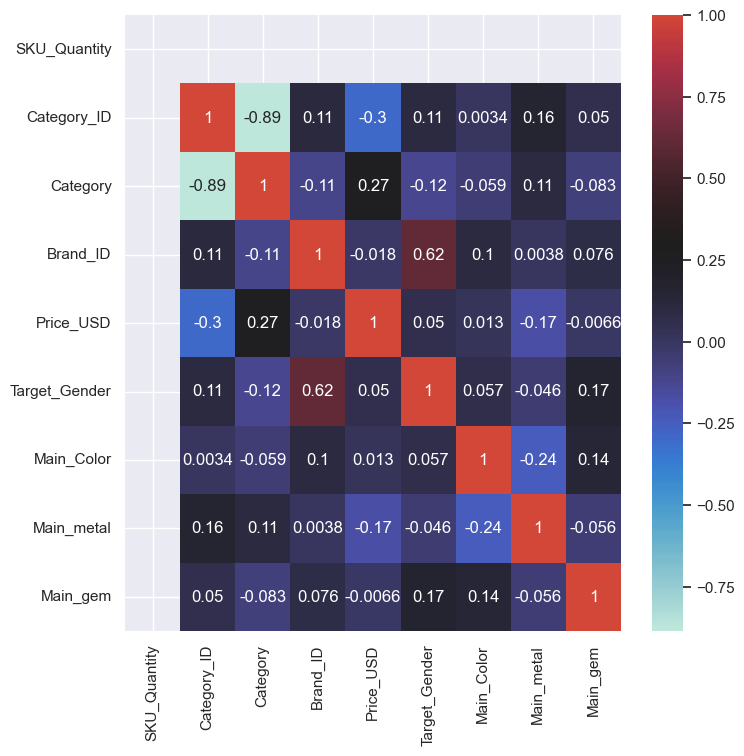

In [99]:
# Correlation heatmap

plt.figure(figsize = (8, 8))
sns.heatmap(correlations, annot = True, center = .3)

plt.show(); plt.close()

In [100]:
# set correlation limit

upper = 1
lower = .2

In [102]:
# Explicitly obtain correlated features

correlated_columns = {
    column: correlations[(correlations[column]> lower) & (correlations[column]< upper)].index.tolist()
    for column in correlations.columns
}

In [105]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_metal': [],
 'Main_gem': []}

2.2. Data Implications

Implied by our findings above, we observe the following:
1. **Missing Values:** There are a lot of missing values in the datset. This can be fixed either by value imputation or missingness encoding
2. **Data Corruption:** Some variables (eg. jewelry_category) contain corrupt values.
3. **Rare Values:** Some features contain values that occure rarely. A prime instance of this is the target_gender column, where the male target is rarely represented. Other times, like this case, this can be a true reflection of the distribution from which the data is generated.
4. **Low Cardinality or Feature Invariance:** SKU_Quantity feature has only one unique value (e.g., 1). This feature provide no new information
5. **Target SKew:** The target varaible is highly right-skewed. This present an issue during training
6. **Correlation:** For the most part, the features present low multicollinearity, hence, ensuring feature independence. However, the target variable exhibit low correlation with the independent variables.

# 3. Data Preparation 
Based on the data implications prior, the following will be experimented upon in the data preparation stage.
1. The missing values: The missing values will be treated via algorithmic methed. SimpleImputer
2. Feature Encoding: The categorical features will be encoded
3. redundant Features: Certain features will be eliminated for the number of reasons. These are:
   - A. SKU_QUantity: Feature Invariance
   - B. Order_ID: Simple identifier, has no real world influence on the jewelry price
   - C. Product_ID: Same with Order_ID
   - D. Order_Datetime: avoid data leakage, would likely not be available in real world
4. Target Skew: The target variable is strongly rightly-skewed. This can be issue when learning a mapping from the data space to a label space. This isue will beb fixed using TransformerTargetRegressor utility.
Note: Most of the data preparation steps will be carried out via the use of pipline class from Sci-kit learn. The Pipeline object allows us to chain transformers and estimators sequentially for use as one composite object.

High Level steps 
1. ELiminate less useful features
2. Extract records with actual categories
3. Encode categorical features (if required)
4. Account for target skew
5. Fix missing values


In [109]:
# Columns to eliminate
columns_to_eliminate = [
    'SKU_Quantity',
    'Category_ID',
    'Order_ID',
    'product_ID',
    'User_ID'
]

In [111]:
# Eliminate unused Features
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True)

In [113]:
data.head(4)

,Order_datetime,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_metal,Main_gem
0,2018-12-01 17:38:31 UTC,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst


In [115]:
data.shape

(95910, 8)

In [117]:
# Eliminate unused Features
data.drop(labels = ['Order_datetime'], axis = 1, inplace = True)

In [119]:
data.shape

(95910, 7)

In [121]:
# Eliminate unrealistic categories 
data = data.loc[data['Category'].isin(categories), :]

In [123]:
data.shape

(80458, 7)

# train_test_split function
The train_test_split function from the sklearn.model_selection module is a utility used to split your dataset into training and testing sets. This is a fundamental step in building and validating machine learning models. 

Purpose
Training Set: Used to train the machine learning model.
Testing Set: Used to evaluate the performance of the trained model on unseen data.
How It Works
The train_test_split function splits arrays or matrices into random train and test subsets. This helps in assessing how well the model generalizes to new, unseen data.

In [126]:
from sklearn.model_selection import train_test_split

In [128]:
# separate feature from label
x, y = data.drop(labels = ['Price_USD'], axis = 1), data['Price_USD']

In [130]:
# Ctreate test train splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

In [132]:
x_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_metal,Main_gem
49678,jewelry.ring,2.0,f,red,gold,diamond
91111,jewelry.earring,1.0,f,red,gold,NaN
46874,jewelry.pendant,1.0,f,red,gold,diamond
46133,jewelry.ring,0.0,f,white,gold,fianit
37944,jewelry.ring,1.0,f,red,gold,fianit


In [134]:
y_train.head()

49678    369.73
91111    242.47
46874    212.19
46133    316.30
37944     71.10
Name: Price_USD, dtype: float64

In [136]:
y_test.head()

72037    113.56
17853     46.44
52949    493.01
64666    354.79
38145    177.95
Name: Price_USD, dtype: float64

In [138]:
y_train.head()

49678    369.73
91111    242.47
46874    212.19
46133    316.30
37944     71.10
Name: Price_USD, dtype: float64

# 4.0 Data Modeling 
1. Linear Regression: 
2. Extremyly Random Forest (ExtraTrees)
3. Adaptive Boosting (AdaBoost)
4. Categorical Boosting (CatBoost)

# 1. Linear Regression
Overview:
Linear Regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). It assumes that there is a linear relationship between the variables.

Key Points:

Simple Linear Regression: Involves one independent variable.
Multiple Linear Regression: Involves multiple independent variables.
Applications:

Predicting prices (e.g., house prices, stock prices)
Forecasting (e.g., sales, demand)
# 2. Extremely Randomized Trees (ExtraTrees)
Overview:
ExtraTrees (Extremely Randomized Trees) is an ensemble learning method that builds multiple trees using random samples of the data and random splits of the features. It's similar to Random Forest but with more randomness.

Key Points:

- Ensemble Method: Combines the predictions of multiple trees.
- Random Splits: Splits are chosen randomly rather than the best split.
- Faster Training: More randomness can lead to faster training times.
- Reduced Overfitting: More randomness can help in reducing overfitting.
Applications:

Classification tasks (e.g., spam detection, image recognition)
Regression tasks (e.g., predicting continuous values)
# 3. Adaptive Boosting (AdaBoost)
Overview:
AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak learners to create a strong learner. It focuses on misclassified instances, giving them higher weights in subsequent iterations.

Key Points:

Weak Learners: Typically, decision stumps (trees with one level).
- Iterative Process: Weights are adjusted iteratively to focus on difficult instances.
- Boosting: Improves accuracy by combining weak learners.
- Sensitive to Noise: Can be sensitive to noisy data and outliers.
Applications:

Binary classification (e.g., fraud detection, sentiment analysis)
Multi-class classification
# 4. CatBoost
Overview:
CatBoost (Categorical Boosting) is a gradient boosting algorithm specifically designed to handle categorical data efficiently. It's developed by Yandex and is known for its high performance and ease of use.

Key Points:

- Handling Categorical Data: Built-in support for categorical features.
- Gradient Boosting: Combines predictions from multiple weak models.
- Robust to Overfitting: Incorporates mechanisms to reduce overfitting.
- Efficient: Optimized for speed and accuracy.
Applications:

Any machine learning task with categorical data
Classification and regression tasks
# synopsis
- Linear Regression: Simple and effective for linear relationships.
- ExtraTrees: Fast and reduces overfitting with more randomness.
- AdaBoost: Combines weak learners, focusing on difficult instances.
- CatBoost: Excels with categorical data and is efficient in handling large datasets.

# Remaining activities from the data preparation steps
1. Encode categorical features (if required)
2. Account for target skew
2. Fix missing values

In [143]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
!pip install catboost
from catboost import CatBoostRegressor  


In [144]:
from sklearn.pipeline import Pipeline

In [145]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):
    # Fix missing values
    first_transformer = ColumnTransformer(
        transformers = [
            ('Imputer', SimpleImputer(strategy = 'most_frequent'), column_indices)
        ],
        remainder = 'passthrough',
        sparse_threshold = 0
    )
    # One hot encode
    '''One-hot encoding is a technique to convert categorical variables into a format 
    that can be provided to machine learning algorithms to do a better job in prediction. 
    It transforms each categorical value into a new categorical column and assigns a binary 
    value of 1 or 0 to each column. '''
    second_transformer = ColumnTransformer(
        transformers = [
            ('one_hot', OneHotEncoder(), categorical_indices)
        ],
        remainder = 'passthrough',
        sparse_threshold = 0
    )
    # Label encode
    '''Ordinal encoding converts categorical variables into integer values. 
    It’s useful when the categorical values have an ordinal relationship 
    (e.g., 'first', 'second', 'thrid'). '''
    third_transformer = ColumnTransformer(
        transformers = [
            ('ordinal', OrdinalEncoder(), categorical_indices)
        ],
        remainder = 'passthrough',
        sparse_threshold = 0
    )
    steps = []
    if fill_missing:
        steps.append(('first', first_transformer))
    if label_encode:
        steps.append(('third', third_transformer))
    if one_hot:
        steps.append(('second', second_transformer))
        
    steps.append(('model', model))    
    model_pipe = Pipeline(steps = steps)
    return model_pipe

In [146]:
x.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_metal,Main_gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [147]:
# Generate indices 

# Get a list of all column names
columns = x.columns.tolist()

# Generate a list of indices for all columns
column_indices = [columns.index(c) for c in columns]

# Identify categorical features by excluding 'Brand_ID'
categorical_features = [c for c in columns if c not in ['Brand_ID']]

# Generate a list of indices for the categorical features
categorical_indices = [columns.index(c) for c in categorical_features]

In [148]:
categorical_features

['Category', 'Target_Gender', 'Main_Color', 'Main_metal', 'Main_gem']

In [149]:
column_indices

[0, 1, 2, 3, 4, 5]

# Instantiate pipelines

In [151]:
# CatBoost pipeline
cat_pipe = generate_pipeline (
    CatBoostRegressor(loss_function = 'RMSE', iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True 
)

# CatBoost pipeline
the parameters fill_missing = False, one_hot = False, and label_encode = True are set based on the specific requirements and capabilities of the CatBoost model. Here's why each parameter is set as such:

# fill_missing = False:

Reason: CatBoost natively handles missing values. It has built-in mechanisms to deal with missing data without the need for explicit imputation. Therefore, setting fill_missing to False leverages this capability and avoids unnecessary preprocessing steps.
# one_hot = False:

Reason: While one-hot encoding is a common technique to handle categorical features, CatBoost can handle categorical features directly without converting them to binary vectors. CatBoost uses its own techniques to deal with categorical data efficiently, making one-hot encoding unnecessary. Hence, one_hot is set to False.
# label_encode = True:

Reason: Label encoding converts categorical values into numerical labels. This is required by CatBoost to recognize and process categorical features. Since CatBoost can handle categorical features natively, they need to be encoded as integer labels, which is why label_encode is set to True.

In [153]:
# Linear regression pipeline
lin_pipe = generate_pipeline (
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False 
)

# linear regression pipeline setup, 
the choices for fill_missing, one_hot, and label_encode are influenced by the characteristics of linear regression models and the nature of the data.
- Fill Missing = True: Ensures the dataset is complete with no missing values, which is crucial for linear regression models. Linear regression models cannot handle missing values directly. If the dataset has any missing values, they need to be imputed (filled) before training the model.
- One Hot = True: Converts categorical variables into a binary format that linear regression can handle effectively, avoiding unintended ordinal relationships. Linear regression models require numerical inputs.
- Label Encode = False: Prevents the introduction of ordinal relationships that could mislead the linear regression model.

In [155]:
# AdaBoost pipeline
ada_pipe = generate_pipeline (
    AdaBoostRegressor(loss = 'exponential', n_estimators = 1000, learning_rate = .01 ),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False 
)

# AdaBoost pipeline setup
the settings for fill_missing, one_hot, and label_encode are influenced by the characteristics of AdaBoost models and the nature of the data.
- Fill Missing = True: Ensures the dataset is complete with no missing values, which is crucial for AdaBoost models to function correctly. Similar to linear regression, AdaBoost models cannot handle missing values directly.
- One Hot = True: Converts categorical variables into a binary format that avoids unintended ordinal relationships, making the data more explicit and potentially improving model performance.
- Label Encode = False: Prevents the introduction of ordinal relationships that could mislead the AdaBoost model

In [157]:
# ExtraTrees pipeline
extra_pipe = generate_pipeline (
    ExtraTreesRegressor(criterion = 'friedman_mse', n_estimators = 1000, bootstrap= True ),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False 
)

# ExtraTrees pipeline setup
the settings for fill_missing, one_hot, and label_encode are chosen based on the characteristics of the ExtraTrees algorithm and the nature of your data.
- Fill Missing = True: Ensures the dataset is complete with no missing values, which is crucial for ExtraTrees models to function correctly. ExtraTrees (Extremely Randomized Trees) models cannot handle missing values directly. If the dataset has any missing values, they need to be imputed before training the model.
- One Hot = True: Converts categorical variables into a binary format that avoids unintended ordinal relationships, making the data more explicit and potentially improving model performance.
- Label Encode = False: Prevents the introduction of ordinal relationships that could mislead the ExtraTrees model.

In [159]:
from sklearn.preprocessing import PowerTransformer 

In [160]:
# Transform target 
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = 'box-cox'))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = 'box-cox'))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = 'box-cox'))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = 'box-cox'))

In [161]:
# Fit CatBoost 
cat_pipe.fit(x_train, y_train)

0:	learn: 0.9627892	total: 184ms	remaining: 30m 41s
1:	learn: 0.9245606	total: 201ms	remaining: 16m 42s
2:	learn: 0.8977444	total: 211ms	remaining: 11m 42s
3:	learn: 0.8701793	total: 223ms	remaining: 9m 18s
4:	learn: 0.8503862	total: 234ms	remaining: 7m 48s
5:	learn: 0.8292673	total: 246ms	remaining: 6m 49s
6:	learn: 0.8144629	total: 256ms	remaining: 6m 5s
7:	learn: 0.7993669	total: 267ms	remaining: 5m 33s
8:	learn: 0.7892479	total: 277ms	remaining: 5m 7s
9:	learn: 0.7796398	total: 287ms	remaining: 4m 46s
10:	learn: 0.7691460	total: 298ms	remaining: 4m 30s
11:	learn: 0.7612546	total: 309ms	remaining: 4m 16s
12:	learn: 0.7552725	total: 319ms	remaining: 4m 4s
13:	learn: 0.7499105	total: 331ms	remaining: 3m 56s
14:	learn: 0.7449984	total: 345ms	remaining: 3m 49s
15:	learn: 0.7378920	total: 356ms	remaining: 3m 41s
16:	learn: 0.7333531	total: 367ms	remaining: 3m 35s
17:	learn: 0.7275835	total: 380ms	remaining: 3m 30s
18:	learn: 0.7240031	total: 395ms	remaining: 3m 27s
19:	learn: 0.7193662	t

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x000001884CC46E40>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [175]:
# Fit Linear Regression  
lin_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0,
                                                                        transformers=[('Imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [176]:
# Fit AdaBoost 
ada_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0,
                                                                        transformers=[('Imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [177]:
# Fit ExtraTrees
extra_pipe.fit(x_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0,
                                                                        transformers=[('Imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

# 05. MODEL EVALUATION 
1. R2
2. RMSE (Root Mean Squared Error) = Square root of mean squared error 

In [180]:
from sklearn.metrics import r2_score, mean_squared_error

In [181]:
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value) 

In [182]:
def generate_model_score(model, data, metric_function):
    x, y = data
    y_ = model.predict(x)
    score = metric_function(y, y_)
    return score  

In [183]:
def print_metrics(name_score, train_score, test_score):
    print(f"Train {name_score} = {train_score}")
    print(f"Test {name_score} = {test_score}")
    print(f"Generalization error = {train_score - test_score}")

In [316]:
def test_model(model, data, metric_name, metric_function):
    train, test = data

    if isinstance(metric_name, str): # single metric 
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_metrics(metric_name, train_score, test_score)
        
    else: # multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_metrics(name, train_score, test_score)
        
    return 

In [318]:
# Name and Functions for Metrics

metric_name = ['R2', 'RMSE']
metric_function = [r2_score, root_mean_squared_error]

In [320]:
# Create data variable 
data_ = [
    [x_train, y_train],
    [x_test, y_test]
]

In [322]:
# Test CatBoost model 
print("CatBoost Model Metrics:")
test_model(cat_pipe, data_, metric_name, metric_function)

CatBoost Model Metrics:
Train R2 = 0.3128856730606776
Test R2 = 0.41149189045511714
Generalization error = -0.09860621739443953
Train RMSE = 370.8581333104127
Test RMSE = 282.8497508542001
Generalization error = 88.00838245621259


In [323]:
# Test Linear Regression model
print("Linear Regression Model Metrics:")
test_model(lin_pipe, data_, metric_name, metric_function)

Linear Regression Model Metrics:
Train R2 = 0.06759980649857911
Test R2 = 0.11085127711352971
Generalization error = -0.043251470614950605
Train RMSE = 432.01068004157753
Test RMSE = 347.66964904372935
Generalization error = 84.34103099784818


In [324]:
# Test AdaBoost model 
print("AdaBoost Model Metrics:")
test_model(ada_pipe, data_, metric_name, metric_function)

AdaBoost Model Metrics:
Train R2 = 0.0700669526549319
Test R2 = 0.10017234507684858
Generalization error = -0.030105392421916677
Train RMSE = 431.43874779416524
Test RMSE = 349.75122388779
Generalization error = 81.68752390637525


In [325]:
# Test ExtraTrees model
print("ExtraTrees Model Metrics:")
test_model(extra_pipe, data_, metric_name, metric_function)

ExtraTrees Model Metrics:
Train R2 = 0.21470421093279013
Test R2 = 0.2631720130207241
Generalization error = -0.048467802087934
Train RMSE = 396.46964350484154
Test RMSE = 316.4919231522267
Generalization error = 79.97772035261482


# Analysis and Recommendations

# 1. Performance Comparison:
## R2 Score: 
The R2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. The closer the R2 score is to 1, the better the model explains the variability of the response data.
- a. The CatBoost model has the highest R2 score for both the training (0.3129) and test data (0.4115), indicating it explains the variability of the response data better than the other models.
- a. The Linear Regression and AdaBoost models have relatively low R2 scores, indicating they do not explain the variance in the data well.
- c. The ExtraTrees model performs moderately well with R2 scores of 0.2147 (train) and 0.2632 (test).
## RMSE: 
The RMSE measures the average magnitude of the error. It’s the square root of the average squared differences between predicted and actual values. Lower RMSE values indicate better model performance.
- a. The CatBoost model has the lowest RMSE for the test data (282.85), indicating it has the least average prediction error.
- b. The ExtraTrees model has a moderate RMSE (316.49), followed by Linear Regression and AdaBoost with higher RMSE values.
# 2. Generalization:
- The generalization error is the difference in performance between the training and test datasets. Smaller differences indicate better generalization to new, unseen data.
- a. The CatBoost model shows a negative generalization error in R2 (-0.0986) and a higher RMSE generalization error (88.01), indicating some overfitting but generally performing well.
- b. ExtraTrees also shows moderate generalization with slightly less overfitting compared to CatBoost.
- c. Linear Regression and AdaBoost have relatively higher generalization errors, indicating these models might not generalize well to unseen data.



# Professional Recommendations
1.	Model Selection:
- Given the metrics, the CatBoost model is the best performer in terms of both R2 score and RMSE. It should be the primary model for deployment, especially since it explains the variability better and has the lowest prediction error on the test data.
2.	Model Improvement:
- CatBoost: To further reduce overfitting and improve generalization, consider using techniques such as cross-validation, hyperparameter tuning, and increasing the dataset size if possible.
- ExtraTrees: As a secondary option, the ExtraTrees model can be fine-tuned further for potential improvements.
3.	Further Testing:
- Conduct additional tests with cross-validation to ensure the robustness of the CatBoost model.
- Experiment with feature engineering and additional preprocessing steps to enhance model performance.
4.	Deployment:
- Deploy the CatBoost model while continuously monitoring its performance. Set up a feedback loop to regularly update the model with new data and retrain it to maintain accuracy.
5.	Documentation and Reporting:
- Document the findings, model selection process, and performance metrics comprehensively. Present these insights to stakeholders to justify the choice of the CatBoost model for production use.
6.	Data Completeness:
- The dataset contains a significant amount of missing data. It is crucial for the company to implement strategies to generate more complete and comprehensive datasets. This can involve improving data collection processes, integrating additional data sources, and employing methods to handle missing data more effectively.
7.	Data Quality:
- A large portion of the data was found to be corrupted. The company should focus on obtaining cleaner data to ensure better problem-solving capabilities. This can be achieved by enhancing data validation protocols, implementing automated data cleaning tools, and conducting regular audits of the data collection processes.
8.	Data Collection:
- Consider revisiting the data collection methods to ensure that all necessary information is captured accurately. This may include investing in better data collection technologies, training staff on proper data entry procedures, and using standardized formats for data entry.
9.	Data Management:
- Implement robust data management practices to maintain the integrity and quality of the data. This includes establishing data governance policies, using reliable data storage solutions, and ensuring data security to prevent corruption.
10.	Regular Reviews:
- Set up a process for regular reviews of the data to identify and rectify any issues promptly. This will help maintain the quality and reliability of the dataset over time, ensuring that the models built using this data are accurate and effective.
By addressing these recommendations, the company can improve the overall quality of its data, leading to more accurate models and better decision-making capabilities for jewelry price optimization.



# 06. Model Deployment 